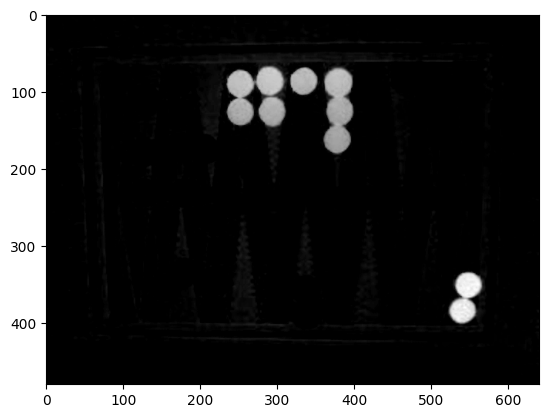

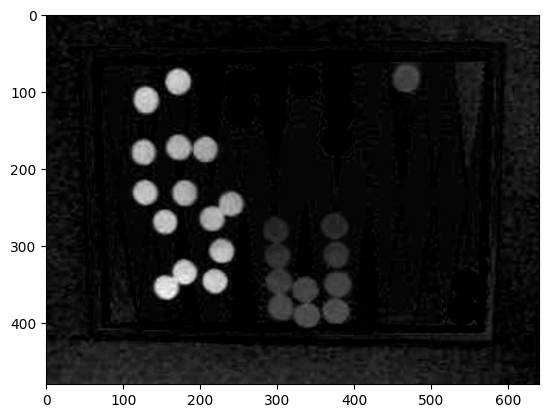

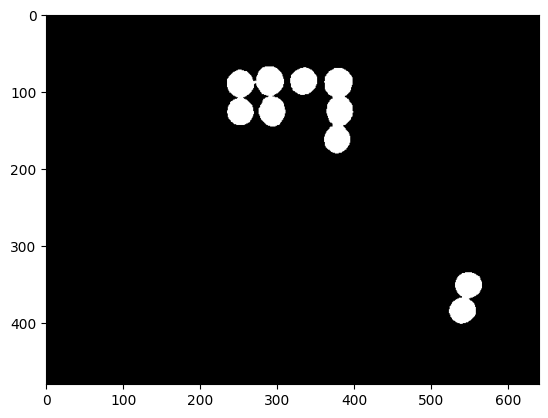

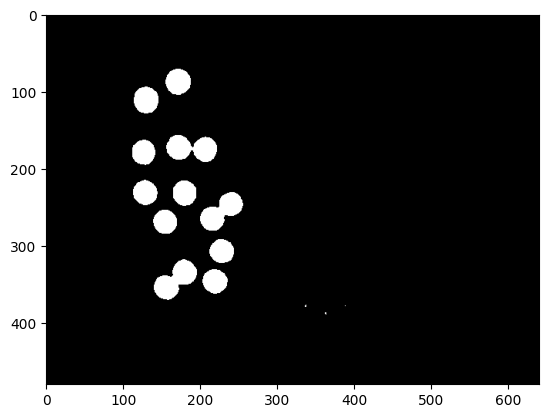

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./test397116.jpg')

b, g, r = cv2.split(img)
r_minus_g = cv2.subtract(r, g)
g_minus_r = cv2.subtract(g, r)

plt.imshow(r_minus_g, cmap='gray')
plt.figure()
plt.imshow(g_minus_r, cmap='gray')

rg_thresh = cv2.threshold(r_minus_g, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
gr_thresh = cv2.threshold(g_minus_r, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

plt.figure()
plt.imshow(rg_thresh, cmap='gray')
plt.figure()
plt.imshow(gr_thresh, cmap='gray')

In [8]:
# invert the thresholded images
# rg_thresh = cv2.bitwise_not(rg_thresh)
# gr_thresh = cv2.bitwise_not(gr_thresh)

# plt.figure()
# plt.imshow(rg_thresh, cmap='gray')
# plt.figure()
# plt.imshow(gr_thresh, cmap='gray')

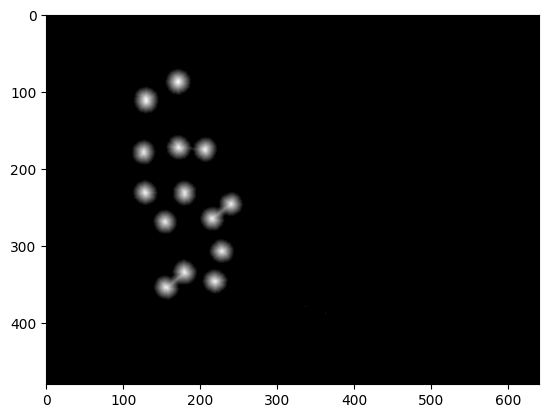

In [13]:

# ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
dist_map = cv2.distanceTransform(gr_thresh, cv2.DIST_L2, 3)
cv2.normalize(dist_map, dist_map, 0, 1.0, cv2.NORM_MINMAX)

plt.imshow(dist_map, cmap='gray')


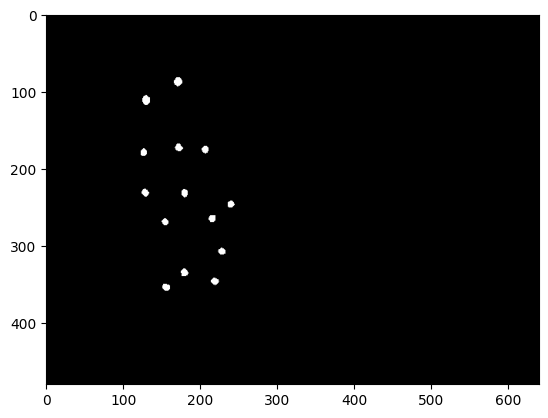

In [14]:
# find the ultimate eroded points
_, sure_fg = cv2.threshold(dist_map, 0.7*dist_map.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
plt.imshow(sure_fg, cmap='gray')

60.0
58.0
60.0
52.0
47.5
55.0
50.5
56.5
58.0
51.5
55.0
60.5
84.0
81.5


ValueError: 'bgr' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

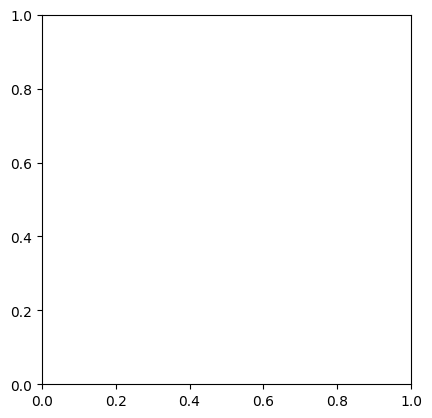

In [18]:

contours, _ = cv2.findContours(sure_fg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    print(cv2.contourArea(contour))
filtered_contours = [
    contour for contour in contours if cv2.contourArea(contour) > 0 and cv2.contourArea(contour) < 200
]
centers = []
for contour in filtered_contours:
    moments = cv2.moments(contour)
    center = (
        int(moments["m10"] / moments["m00"]),
        int(moments["m01"] / moments["m00"]),
    )
    centers.append(center)

for center in centers:
    cv2.circle(img, center, 5, (0, 255, 0), -1)

plt.imshow(img)